<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/pandas_temporal_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas - Datos Temporales y Categóricos
## [MSc: Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

En posts anteriores hemos visto cómo trabajar con `Pandas` para manipular datos tabulares de diferentes maneras, sin embargo nos hemos centrado en datos de tipo numérico ya que son el tipo de datos que necesitamos para entrenar nuestros modelos de `Machine Learning`. Sin embargo, muchos datos no están en formato numérico, y en este post vamos a ver como `Pandas` nos puede ayudar a la hora de trabajar con este tipo de datos, en concreto hablaremos sobre datos de tipo temporal y categóricos.

In [1]:
import pandas as pd

## Datos Temporales

Podemos encontrar datos temporales en multitud de aplicaciones como por ejemplo financieras, económicas, médicas... Este tipo de fuente de datos se nos suele presentar como una secuencia de instantes en el tiempo formada por una marca de tiempo (o *timestamp*) acompañada por una cantidad determinada de características relativas al instante temporal en cuestión. Esta estructura de datos suele conocerse por el nombre de `serie temporal` y ejemplos en los campos mencionados anteriormente podrían ser la evolución de ventas de una empresa en el tiempo, el número de visitantes en una web a lo largo de un día o la evolución de la temperatura en un paciente. 

Podemos crear una serie temporal con la función `date_range` indicando la fecha de inicio, el número de instantes temporales y la frecuencia.

In [2]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

Como puedes observar, la función devuelve una lista de índices temporales. Esto significa que podemos usarlo como índices para una `Series` de datos.

In [3]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

Y como ya hemos visto anteriormente, podemos visualizar esta serie temporal de manera sencilla.

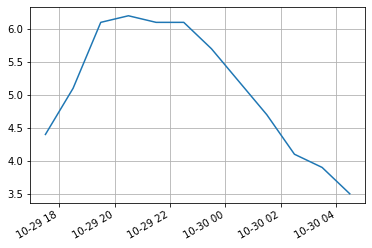

In [4]:
import matplotlib.pyplot as plt 

temp_series.plot()
plt.grid(True)
plt.show()

Podemos modificar la serie temporal para interpolar nuevos valores en diferentes instantes gracias a la función `resample`

In [7]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

Esta función no nos devuelve una nueva `Series`, para ello tenemos que llamar a alguno de sus métodos para llevar a cabo los cálculos necesarios para el re-muestreo de la serie temporal.

In [8]:
temp_series_freq_2H = temp_series_freq_2H.mean()
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

Ahora nuestra serie temporal tiene la mitad de puntos, ya que hemos re-muestreado cada dos horas, y cada valor se calcula como el valor medio entre el instante anterior y consecutivo. Podemos aumentar el número de muestras de maneras similar, sin embargo esto va a crear huecos en la serie temporal.

In [9]:
temp_series_freq_30min = temp_series.resample("30Min").mean()
temp_series_freq_30min

2016-10-29 17:30:00    4.4
2016-10-29 18:00:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 19:00:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 20:00:00    NaN
2016-10-29 20:30:00    6.2
2016-10-29 21:00:00    NaN
2016-10-29 21:30:00    6.1
2016-10-29 22:00:00    NaN
2016-10-29 22:30:00    6.1
2016-10-29 23:00:00    NaN
2016-10-29 23:30:00    5.7
2016-10-30 00:00:00    NaN
2016-10-30 00:30:00    5.2
2016-10-30 01:00:00    NaN
2016-10-30 01:30:00    4.7
2016-10-30 02:00:00    NaN
2016-10-30 02:30:00    4.1
2016-10-30 03:00:00    NaN
2016-10-30 03:30:00    3.9
2016-10-30 04:00:00    NaN
2016-10-30 04:30:00    3.5
Freq: 30T, dtype: float64

La solución es utilizar la función `interpolate`. Por defecto esta función hace una interpolación lineal, pero podemos cambiar el método fácilmente con el argumento `method`.

In [10]:
temp_series_freq_30min = temp_series.resample("30Min").interpolate(method="cubic")
temp_series_freq_30min

2016-10-29 17:30:00    4.400000
2016-10-29 18:00:00    4.605113
2016-10-29 18:30:00    5.100000
2016-10-29 19:00:00    5.669887
2016-10-29 19:30:00    6.100000
2016-10-29 20:00:00    6.240339
2016-10-29 20:30:00    6.200000
2016-10-29 21:00:00    6.131257
2016-10-29 21:30:00    6.100000
2016-10-29 22:00:00    6.122133
2016-10-29 22:30:00    6.100000
2016-10-29 23:00:00    5.942712
2016-10-29 23:30:00    5.700000
2016-10-30 00:00:00    5.444518
2016-10-30 00:30:00    5.200000
2016-10-30 01:00:00    4.966715
2016-10-30 01:30:00    4.700000
2016-10-30 02:00:00    4.376123
2016-10-30 02:30:00    4.100000
2016-10-30 03:00:00    3.966292
2016-10-30 03:30:00    3.900000
2016-10-30 04:00:00    3.783708
2016-10-30 04:30:00    3.500000
Freq: 30T, dtype: float64

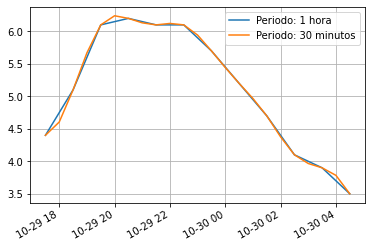

In [11]:
temp_series.plot(label="Periodo: 1 hora")
temp_series_freq_30min.plot(label="Periodo: 30 minutos")
plt.legend()
plt.grid(True)
plt.show()

Por defecto, una serie temporal es genérica en el sentido que no hace referencia a ninguna zona horaria en concreto. `Pandas` nos permite asignar una zona horaria a una serie temporal mediante la función `tz_localize`.

In [18]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

`Pandas` ha añadido la hora UTC a los índices de la serie temporal. Podemos transformar entre diferentes zonas horarias fácilmente

In [19]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

En muchas aplicaciones, especialmente financieras, se suele trabajar por cuatrimestres en lugar de la fecha concreta. Para ello `Pandas` nos ofrece la función `period_range`.

In [20]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

Podemos transformar entre los dos formatos de la siguiente manera

In [21]:
time_stamps = quarters.to_timestamp(how="end", freq="H")
time_stamps

DatetimeIndex(['2016-03-31 23:59:59.999999999',
               '2016-06-30 23:59:59.999999999',
               '2016-09-30 23:59:59.999999999',
               '2016-12-31 23:59:59.999999999',
               '2017-03-31 23:59:59.999999999',
               '2017-06-30 23:59:59.999999999',
               '2017-09-30 23:59:59.999999999',
               '2017-12-31 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

In [22]:
time_stamps.to_period()

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

`Pandas` ofrece muchísima más funcionalidad para trabajar con datos temporales de la que hemos visto en este post. Si trabajas con este tipo de datos vale la pena invertir tiempo en familiarizarse con la librería y su funcionalidad, en la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) podrás encontrar más información. 

## Datos Categóricos

Es muy común en el análisis de datos encontrarse con valores que representan categorías, por ejemplo `"H"` para representar *hombre* y `"F"`, *mujer*. Estos datos pueden resultar difíciles de interpretar y pueden llevar a errores, y para resolver este problema `Pandas` nos ofrece varias funciones. 

In [23]:
df = pd.DataFrame({
    "sexo": {"alice": "F", "bob": "H", "charles": "H"}
})

df

,sexo
alice,F
bob,H
charles,H


Vamos a crear una nueva columna a partir de la columna con las categorías, indicando específicamente que se trata de una columna con datos categóricos

In [27]:
df["sexo_cat"] = df["sexo"].astype('category')
df

,sexo,sexo_cat
alice,F,F
bob,H,H
charles,H,H


Como puedes ver el nombre de las categorías asignadas coinciden con las originales, podemos cambiar las categorías de la siguiente manera

In [28]:
df["sexo_cat"].cat.categories

Index(['F', 'H'], dtype='object')

In [29]:
df["sexo_cat"].cat.categories = ["Mujer", "Hombre"]

df

,sexo,sexo_cat
alice,F,Mujer
bob,H,Hombre
charles,H,Hombre


Si bien hemos sido capaces de modificar el nombre de las categorías, para poder utilizar estos datos para entrenar un modelo de `Machine Learning` necesitamos transformar las categorías en números. De entre las varias formas de hacerlo, la más común es la conocida como `one hot encoding`, en el que transformamos cada categoría por un vector de ceros de longitud igual al número de clases, poniendo un uno en la posición correspondiente a la categoría en cuestión en la lista de clases.

![](https://naadispeaks.files.wordpress.com/2018/04/mtimfxh.png?w=371&h=146)

`Pandas` nos permite llevar a cabo esta codificación con la función `get_dummies`.

In [32]:
pd.get_dummies(df["sexo_cat"])

,Mujer,Hombre
alice,1,0
bob,0,1
charles,0,1


Ahora ya podríamos utilizar estos datos para entrenar nuestro algoritmo. Pese a que `Pandas` nos ofrece esta funcionalidad, en ocasiones necesitamos un extra de funcionalidad que no encontramos en la librería. Es por este motivo que para este tipo de operaciones es más recomendable utilizar, por ejemplo, [Scikit-Learn](https://scikit-learn.org/stable/) que además de ser más potente en el tratamiento de datos categóricos nos ofrece mayor flexibilidad en la etapa de transformación de datos. En futuros posts entraremos en más detalle en esta librería. 

## Resumen

En este post hemos visto diferentes herramientas que podemos encontrar en la librería de análisis de datos `Pandas` para el tratamiento de datos temporales y categóricos. Muchas fuentes de datos consisten en `series temporales`, una secuencia de datos correspondientes a diferentes instantes temporales. Hemos visto como generar series temporales con `Pandas` (en posts anteriores hemos visto como podemos cargar y guardar datos en archivos) y como trabajar con ellas. En cuanto a los datos categóricos, hemos visto como crearlos y modificarlos así como calcular los vectores `one hot encoding` para alimentar nuestros modelos.